<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/AutoKeras_for_Model_Classification_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown
!pip install Pillow


In [3]:
import os
import gdown
from zipfile import ZipFile
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Path to zip folder
zip_path = '/content/dataset.zip'
extract_path = '/content/reality'

# Download a dataset with gdown
gdown.download('https://drive.google.com/uc?id=17g43gjghHXxYv_slVNhfU8p8Yqw8jew1', zip_path, quiet=False)

# Exctract data from dataset
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path to the images and image labels
image_paths = []
labels = []

for category in os.listdir(extract_path):
    category_path = os.path.join(extract_path, category)
    if os.path.isdir(category_path):
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image_paths.append(image_path)
            labels.append(category)

# Encode labels to the int using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Show images, changing a image' size as 64x64
images = []
for image_path in image_paths:
    image = Image.open(image_path).convert('L')  # 'L' - for black and white images
    image = image.resize((64, 64))
    image_array = np.array(image) / 255.0  # Data scaling
    images.append(image_array)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# list of class names and number of classes
class_names = label_encoder.classes_
num_classes = len(class_names)

for class_name in class_names:
    class_count = labels.count(class_name)
    print(f'Class: {class_name}, Count: {class_count}')

'''
Now we have data to train and test a neural network.
X_train, y_train - training dataset
X_test, y_test - test dataset
class_names - list of class names
num_classes - number of classes
'''

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=17g43gjghHXxYv_slVNhfU8p8Yqw8jew1 



Class: NORMAL, Count: 1341
Class: PNEUMONIA, Count: 3875


'\nNow we have data to train and test a neural network.\nX_train, y_train - training dataset\nX_test, y_test - test dataset\nclass_names - list of class names\nnum_classes - number of classes\n'

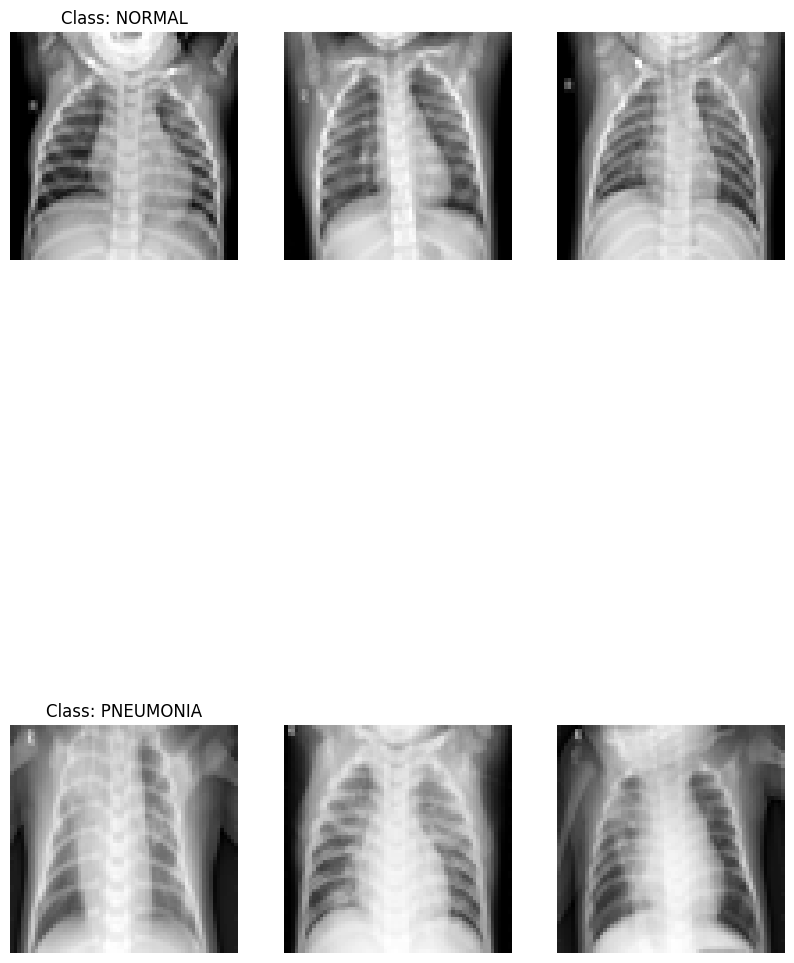

In [4]:
import matplotlib.pyplot as plt

# function to display images for each class
def display_images_per_class(images, labels, class_names):
    fig, axs = plt.subplots(len(class_names), 3, figsize=(10, 15))
    fig.subplots_adjust(hspace=0.5)

    for i, class_name in enumerate(class_names):
        class_indices = [j for j, label in enumerate(labels) if label == i][:3]

        for j, index in enumerate(class_indices):
            axs[i, j].imshow(images[index], cmap='gray')
            axs[i, j].axis('off')

            if j == 0:
                axs[i, j].set_title(f'Class: {class_name}')

    plt.show()

#  display 3 example images for each class
display_images_per_class(X_train, y_train, class_names)


In [5]:
!pip install autokeras
import autokeras as ak
import numpy as np

# using ImageClassifier from AutoKeras
clf = ak.ImageClassifier(overwrite=True, max_trials=2, objective='val_accuracy', multi_label=False, tuner='greedy')

# combine training and test data so that AutoKeras can use it inside the selection process
X_combined = np.concatenate((np.array(X_train), np.array(X_test)))
y_combined = np.concatenate((np.array(y_train), np.array(y_test)))

# training a model
clf.fit(X_combined, y_combined, epochs=5)

# display the architecture of the found model
print(clf.export_model().summary())


Trial 1 Complete [00h 54m 19s]
val_accuracy: 0.9189453125

Best val_accuracy So Far: 0.9189453125
Total elapsed time: 00h 54m 19s
Epoch 1/5
163/163 [==============================] - 783s 5s/step - loss: 0.8085 - accuracy: 0.8725
Epoch 2/5
163/163 [==============================] - 768s 5s/step - loss: 0.1399 - accuracy: 0.9488
Epoch 3/5
163/163 [==============================] - 771s 5s/step - loss: 0.0950 - accuracy: 0.9651
Epoch 4/5
163/163 [==============================] - 772s 5s/step - loss: 0.0639 - accuracy: 0.9741
Epoch 5/5
163/163 [==============================] - 763s 5s/step - loss: 0.0477 - accuracy: 0.9795
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64)]             0         []                            
                                                          